In [6]:
import csv
a = []
with open('lab.csv', 'r') as csvfile:
    next(csvfile)
    for row in csv.reader(csvfile):
        a.append(row)
    print(a)

print("\nThe total number of training instances are : ",len(a))

num_attribute = len(a[0])-1

print("\nThe initial hypothesis is : ")
hypothesis = ['0']*num_attribute
print(hypothesis)

for i in range(0, len(a)):
    if a[i][num_attribute] == 'yes':
        print ("\nInstance ", i+1, "is", a[i], " and is Positive Instance")
        for j in range(0, num_attribute):
            if hypothesis[j] == '0' or hypothesis[j] == a[i][j]:
                hypothesis[j] = a[i][j]
            else:
                hypothesis[j] = '?'
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

    if a[i][num_attribute] == 'no':
        print ("\nInstance ", i+1, "is", a[i], " and is Negative Instance Hence Ignored")
        print("The hypothesis for the training instance", i+1, " is: " , hypothesis, "\n")

print("\nThe Maximally specific hypothesis for the training instance is ", hypothesis)


[['big', 'red', 'circle', 'no'], ['small', 'red', 'triangle', 'no'], ['small', 'red', 'circle', 'yes'], ['big', 'blue', 'circle', 'no'], ['small', 'blue', 'circle', 'yes']]

The total number of training instances are :  5

The initial hypothesis is : 
['0', '0', '0']

Instance  1 is ['big', 'red', 'circle', 'no']  and is Negative Instance Hence Ignored
The hypothesis for the training instance 1  is:  ['0', '0', '0'] 


Instance  2 is ['small', 'red', 'triangle', 'no']  and is Negative Instance Hence Ignored
The hypothesis for the training instance 2  is:  ['0', '0', '0'] 


Instance  3 is ['small', 'red', 'circle', 'yes']  and is Positive Instance
The hypothesis for the training instance 3  is:  ['small', 'red', 'circle'] 


Instance  4 is ['big', 'blue', 'circle', 'no']  and is Negative Instance Hence Ignored
The hypothesis for the training instance 4  is:  ['small', 'red', 'circle'] 


Instance  5 is ['small', 'blue', 'circle', 'yes']  and is Positive Instance
The hypothesis for the 

In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv("lab.csv")
concepts = np.array(data.iloc[:,0:-1])
print("\nInstances are:\n",concepts)
target = np.array(data.iloc[:,-1])
print("\nTarget Values are: ",target)

def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and genearal_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("\nGeneric Boundary: ",general_h)

    for i, h in enumerate(concepts):
        print("\nInstance", i+1 , "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'

        if target[i] == "no":
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("Specific Bundary after ", i+1, "Instance is ", specific_h)
        print("Generic Boundary after ", i+1, "Instance is ", general_h)
        print("\n")

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h

s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")



Instances are:
 [['big' 'red' 'circle']
 ['small' 'red' 'triangle']
 ['small' 'red' 'circle']
 ['big' 'blue' 'circle']
 ['small' 'blue' 'circle']]

Target Values are:  ['no' 'no' 'yes' 'no' 'yes']

Initialization of specific_h and genearal_h

Specific Boundary:  ['big' 'red' 'circle']

Generic Boundary:  [['?', '?', '?'], ['?', '?', '?'], ['?', '?', '?']]

Instance 1 is  ['big' 'red' 'circle']
Instance is Negative 
Specific Bundary after  1 Instance is  ['big' 'red' 'circle']
Generic Boundary after  1 Instance is  [['?', '?', '?'], ['?', '?', '?'], ['?', '?', '?']]



Instance 2 is  ['small' 'red' 'triangle']
Instance is Negative 
Specific Bundary after  2 Instance is  ['big' 'red' 'circle']
Generic Boundary after  2 Instance is  [['big', '?', '?'], ['?', '?', '?'], ['?', '?', 'circle']]



Instance 3 is  ['small' 'red' 'circle']
Instance is Positive 
Specific Bundary after  3 Instance is  ['?' 'red' 'circle']
Generic Boundary after  3 Instance is  [['?', '?', '?'], ['?', '?', '?'], [

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

data=load_iris()
x=data.data
y=data.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
classifier=DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier.fit(x_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


1.0

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

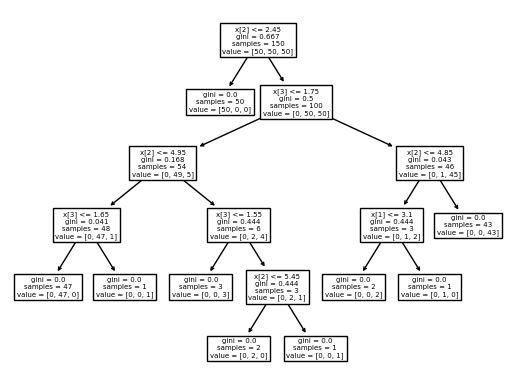

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier()
clf.fit(X, y)

plot_tree(clf)

Accuracy: 1.0


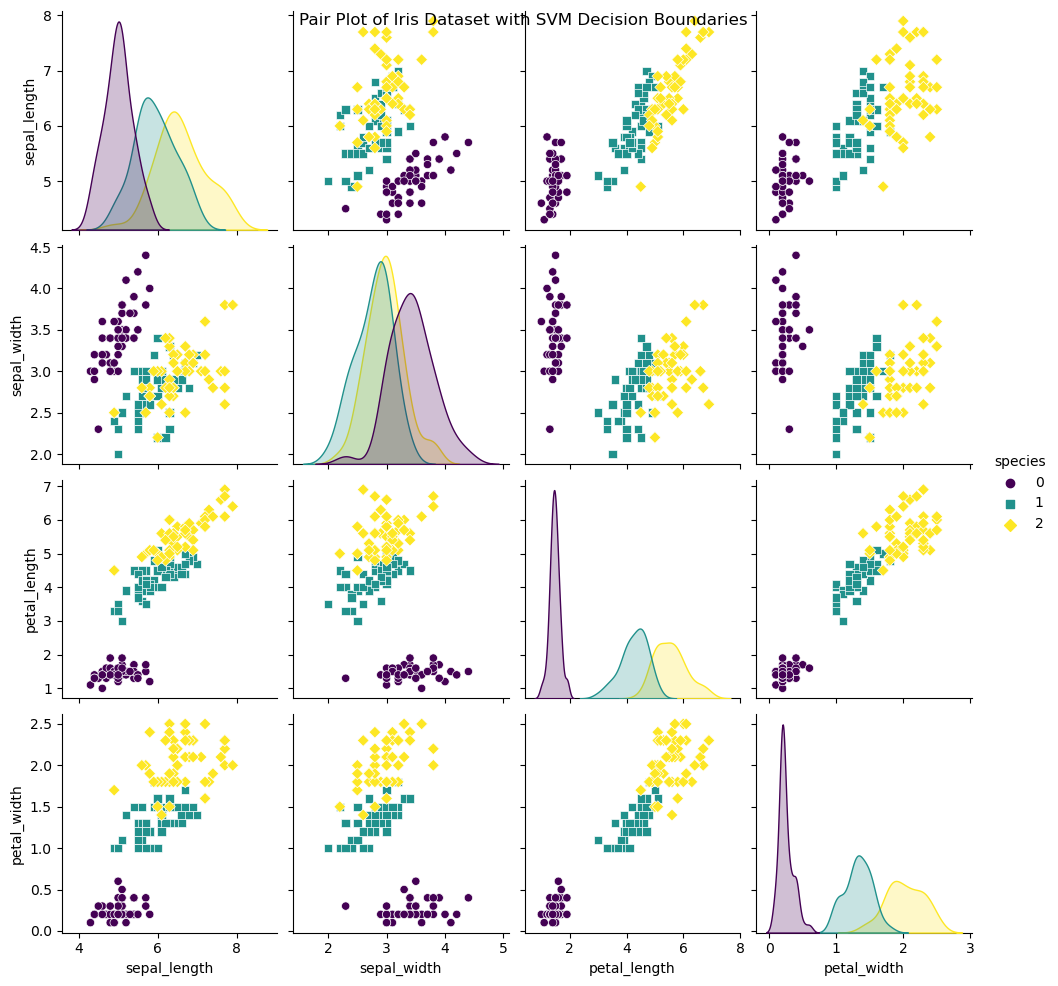

In [10]:
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

data=load_iris()
x=data.data
y=data.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=svm.SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

iris_df = sns.load_dataset('iris')
iris_df['species'] = iris_df['species'].astype('category').cat.codes

# Pair plot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], palette='viridis')
plt.suptitle('Pair Plot of Iris Dataset with SVM Decision Boundaries')
plt.show()

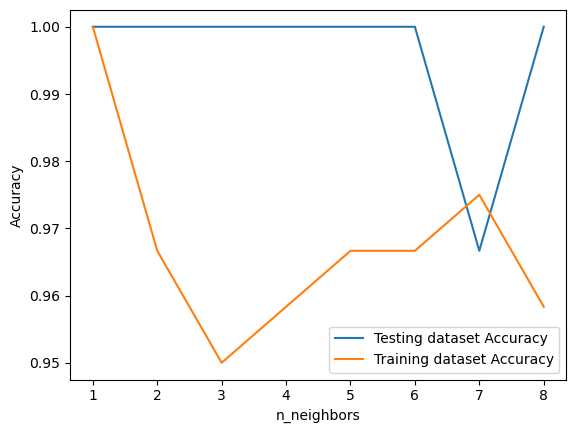

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

irisData = load_iris()
X = irisData.data
y = irisData.target

X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


In [12]:
import numpy as np
from scipy.stats import multivariate_normal

def initialize_parameters(data, num_components):
   
    n_features = data.shape[1]
    
    means = np.random.rand(num_components, n_features)
    covariances = [np.eye(n_features) for _ in range(num_components)]
    weights = np.ones(num_components) / num_components
    
    return means, covariances, weights

def expectation(data, means, covariances, weights):
    num_components = len(weights)
    num_samples = data.shape[0]
    responsibilities = np.zeros((num_samples, num_components))
    
    for i in range(num_components):
        
        responsibilities[:, i] = weights[i] * multivariate_normal.pdf(data, mean=means[i], cov=covariances[i])
    
    
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    
    return responsibilities

def maximization(data, responsibilities):
    num_components = responsibilities.shape[1]
    num_samples = data.shape[0]
    
   
    means = np.dot(responsibilities.T, data) / responsibilities.sum(axis=0, keepdims=True).T
    covariances = [np.cov(data.T, aweights=responsibilities[:, i], ddof=0) for i in range(num_components)]
    weights = responsibilities.sum(axis=0) / num_samples
    
    return means, covariances, weights

def em_algorithm(data, num_components, max_iterations=100, tolerance=1e-4):
    means, covariances, weights = initialize_parameters(data, num_components)
    
    for iteration in range(max_iterations):
        old_means, old_covariances, old_weights = means.copy(), covariances.copy(), weights.copy()
        
        
        responsibilities = expectation(data, means, covariances, weights)
        
       
        means, covariances, weights = maximization(data, responsibilities)
        
    
        if np.all(np.abs(weights - old_weights) < tolerance) and \
           all(np.all(np.abs(means[i] - old_means[i]) < tolerance) for i in range(num_components)) and \
           all(np.all(np.abs(covariances[i] - old_covariances[i]) < tolerance) for i in range(num_components)):
            break
    
    return means, covariances, weights


np.random.seed(42)
data1 = np.random.multivariate_normal(mean=[3, 3], cov=[[1, 0.5], [0.5, 1]], size=100)
data2 = np.random.multivariate_normal(mean=[8, 8], cov=[[1, -0.5], [-0.5, 1]], size=100)
data = np.concatenate([data1, data2])


num_components = 2
means, covariances, weights = em_algorithm(data, num_components)

print("Final means:")
print(means)
print("\nFinal covariances:")
print(covariances)
print("\nFinal weights:")
print(weights)


Final means:
[[3.08307042 3.11709273]
 [7.91067711 8.13281043]]

Final covariances:
[array([[0.81509302, 0.29751947],
       [0.29751947, 0.76768718]]), array([[ 1.08836664, -0.58617092],
       [-0.58617092,  0.94906908]])]

Final weights:
[0.49999999 0.50000001]


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


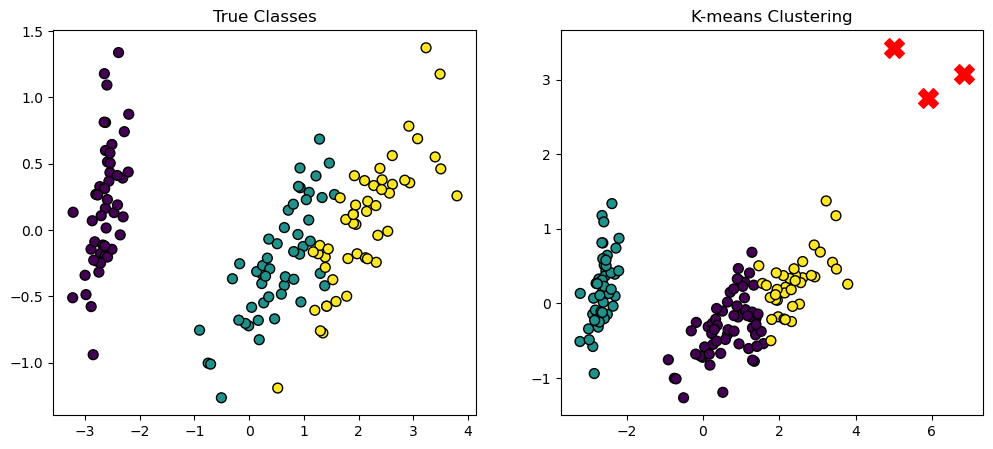

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_
centers = kmeans.cluster_centers_


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("True Classes")


plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title("K-means Clustering")

plt.show()




In [15]:
pip install mlxtend


                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB 1.3 MB/s eta 0:00:02
     -                                        0.0/1.4 MB 653.6 kB/s eta 0:00:03
     ---                                      0.1/1.4 MB 1.2 MB/s eta 0:00:02
     ---                                      0.1/1.4 MB 1.2 MB/s eta 0:00:02
     ------                                   0.2/1.4 MB 1.1 MB/s eta 0:00:02
     -------                                  0.3/1.4 MB 1.0 MB/s eta 0:00:02
     -------                                  0.3/1.4 MB 983.9 kB/s eta 0:00:02
     ---------                                0.3/1.4 MB 967.8 kB/s eta 0:00:02
     ---------                                0.4/1.4 MB 967.1 kB/s eta 0:00:02
     ----------                               0.4/1.4 MB 955.7 kB/s eta 0:00:02
     -----------                              0.4/1.4 MB 935.2 kB/s eta 0:00:02
     ------------                             0.5/1.4 MB 90

In [16]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


transactions = [
    ['bread', 'milk', 'beer'],
    ['bread', 'diapers', 'eggs'],
    ['milk', 'diapers', 'beer', 'colt45'],
    ['bread', 'milk', 'eggs'],
]


te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

min_support = 0.5
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets)


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
   support       itemsets
0     0.50         (beer)
1     0.75        (bread)
2     0.50      (diapers)
3     0.50         (eggs)
4     0.75         (milk)
5     0.50   (milk, beer)
6     0.50  (bread, eggs)
7     0.50  (milk, bread)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0      (beer)      (milk)                 0.5                0.75      0.5   
1      (eggs)     (bread)                 0.5                0.75      0.5   

   confidence      lift  leverage  conviction  zhangs_metric  
0         1.0  1.333333     0.125         inf            0.5  
1         1.0  1.333333     0.125         inf            0.5  


In [19]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


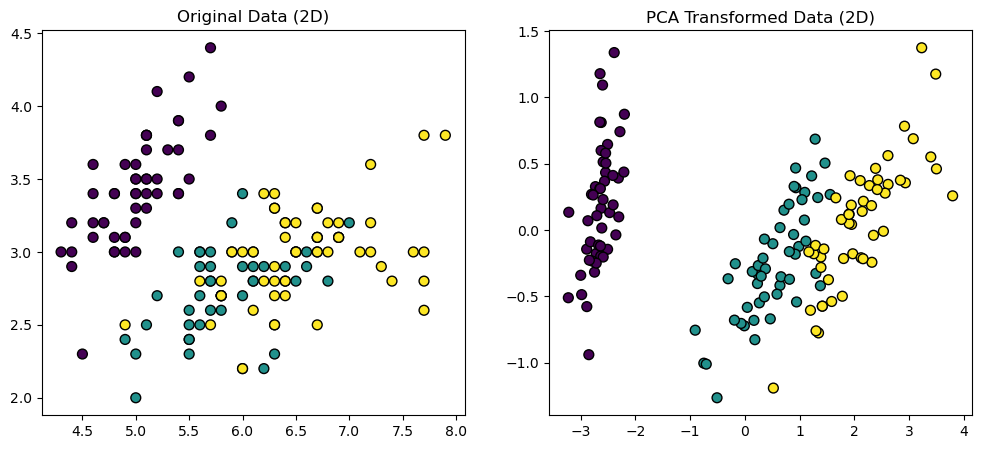

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Original Data (2D)")


plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("PCA Transformed Data (2D)")

plt.show()
